# WeatherPy




In [43]:
# Install Citypy 
%pip install citipy

82048.44s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
Note: you may need to restart the kernel to use updated packages.


In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [47]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Unpack the lat_lngs zip object into a list
coordinates = list(lat_lngs)

# Identify nearest city for each lat, lng combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 776


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [53]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | suchiapa
Processing Record 2 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | lakhipur
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | ayancik
Processing Record 11 of Set 1 | adigrat
Processing Record 12 of Set 1 | nova sintra
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | sona
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | folkston
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | lihue
Processing

In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          742
Lat           742
Lng           742
Max Temp      742
Humidity      742
Cloudiness    742
Wind Speed    742
Country       742
Date          742
dtype: int64

In [55]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Suchiapa,16.6167,-93.0833,80.92,39,0,39.12,MX,1707170689
1,Adamstown,-25.0660,-130.1015,75.63,82,100,15.35,PN,1707170690
2,Lakhipur,26.0299,90.3041,56.50,79,42,7.29,IN,1707170690
3,Papatowai,-46.5619,169.4708,70.48,56,100,9.55,NZ,1707170690
4,Qaqortoq,60.7167,-46.0333,-6.03,69,0,6.26,GL,1707170690


In [56]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Suchiapa,16.6167,-93.0833,80.92,39,0,39.12,MX,1707170689
1,Adamstown,-25.0660,-130.1015,75.63,82,100,15.35,PN,1707170690
2,Lakhipur,26.0299,90.3041,56.50,79,42,7.29,IN,1707170690
3,Papatowai,-46.5619,169.4708,70.48,56,100,9.55,NZ,1707170690
4,Qaqortoq,60.7167,-46.0333,-6.03,69,0,6.26,GL,1707170690


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

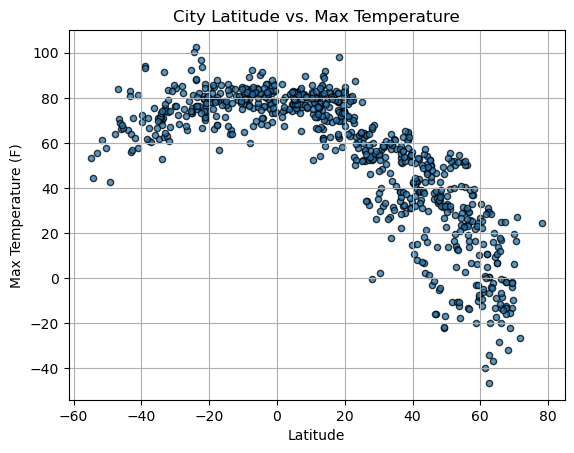

In [58]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

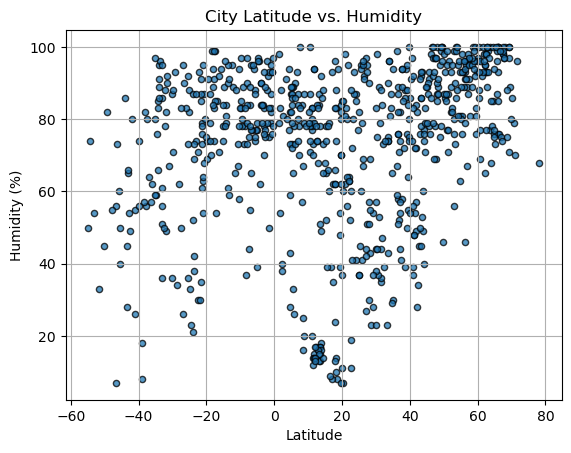

In [60]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

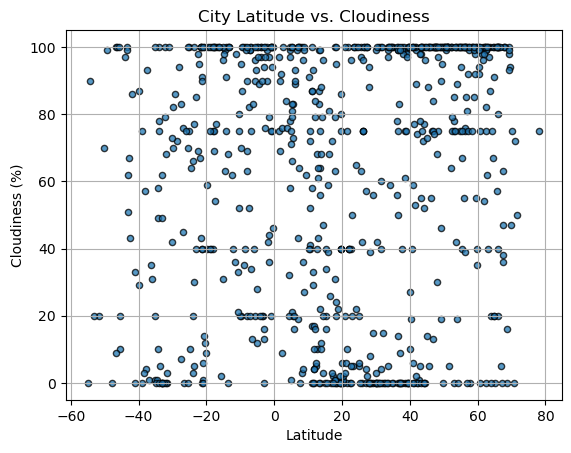

In [61]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

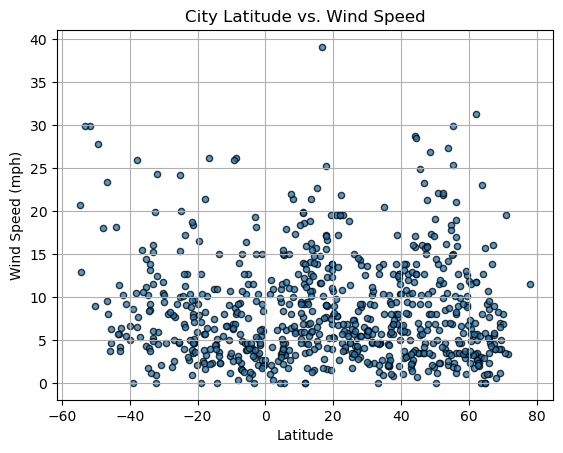

In [62]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="purple")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Suchiapa,16.6167,-93.0833,80.92,39,0,39.12,MX,1707170689
2,Lakhipur,26.0299,90.3041,56.50,79,42,7.29,IN,1707170690
4,Qaqortoq,60.7167,-46.0333,-6.03,69,0,6.26,GL,1707170690
7,Ayancik,41.9447,34.5861,52.61,72,89,12.01,TR,1707170690
8,Adigrat,14.2770,39.4620,58.66,73,47,1.52,ET,1707170690


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Adamstown,-25.0660,-130.1015,75.63,82,100,15.35,PN,1707170690
3,Papatowai,-46.5619,169.4708,70.48,56,100,9.55,NZ,1707170690
5,Blackmans Bay,-43.0167,147.3167,55.72,65,51,4.21,AU,1707170690
6,Grytviken,-54.2811,-36.5092,44.58,74,90,12.95,GS,1707170690
10,Port Elizabeth,-33.9180,25.5701,70.11,95,100,9.22,ZA,1707170611


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8612741506538127


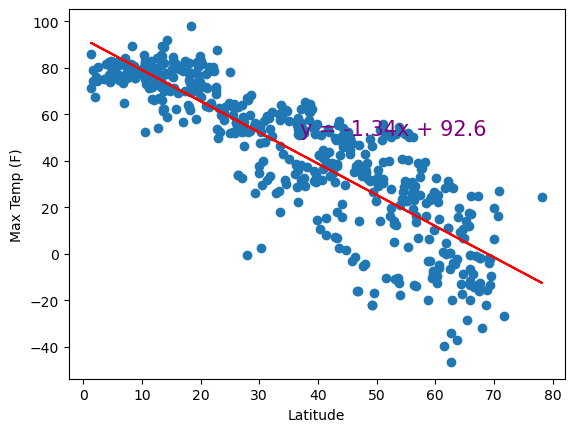

None


In [67]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.47155670433572594


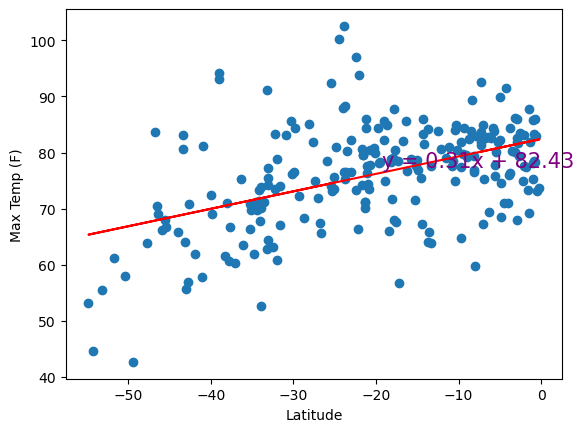

None


In [68]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** In the northern hemisphere, the temperature decreases as the latitude increases, whichs indicates that as you travel north away from the equator, the temperature decreases. Aligning, when looking at the southern hemisphere, the temperature decreases as the latitude decreases, which indicates that as you move south away from the equator the temperature will decrease. Which shows that temperatures across the globe will likely increase as you get closer to the equator

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.4272751456439843


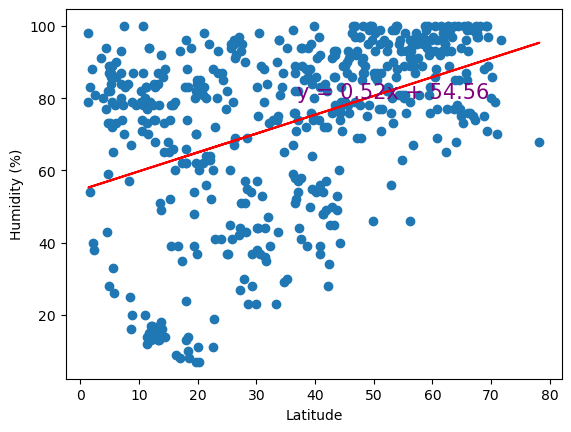

None


In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.4244049031189257


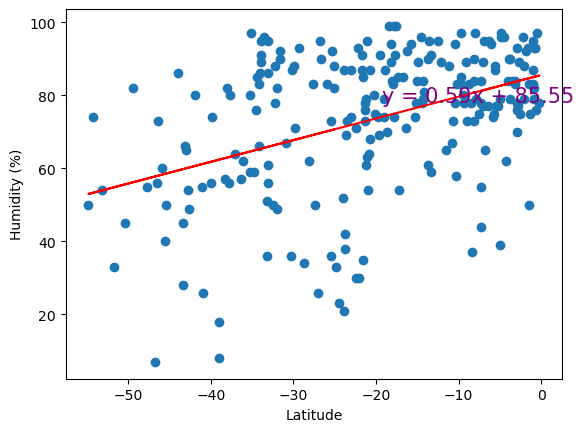

None


In [70]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Similar to temperature, for both the northern as southern hemispheres, when are closer to the equator, the humidity % increases while decreases as you move either further north or south of the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.2547061324574539


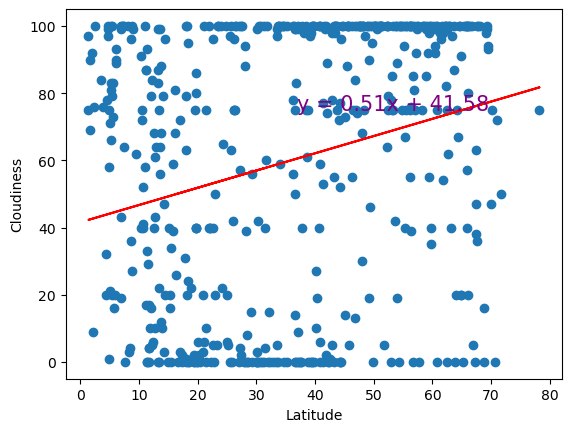

None


In [71]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

The r-squared is: 0.25908363920982047


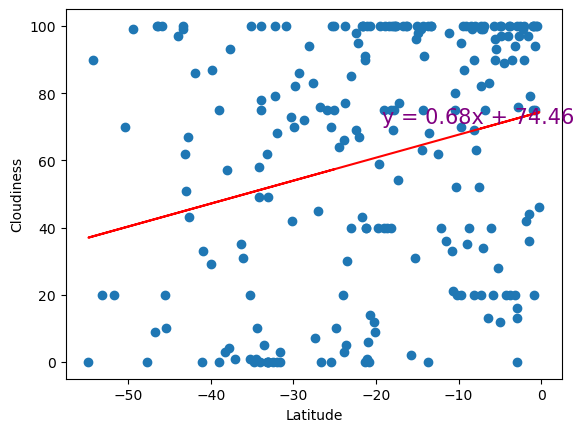

None


In [72]:
# Southern Hemisphere
x_values =southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** For both northern and southern hemispheres, it does not appear to be a relationship correlation for cloudiness and latitude. This is also evident with the R2 being close to 0 as oppose to 1, which would indicate that regression fits R2 percent of the variation of the indicated variable. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.07145407284925955


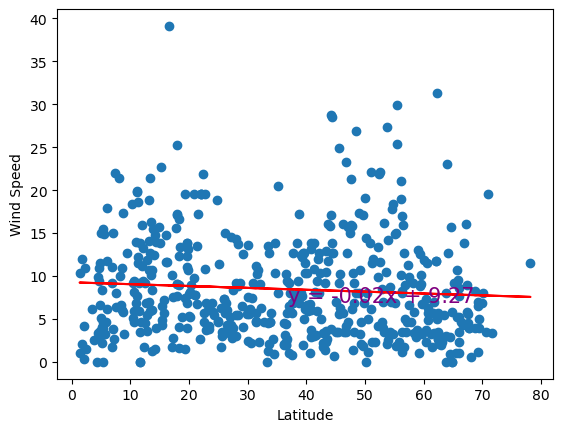

None


In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

The r-squared is: -0.2859452644189458


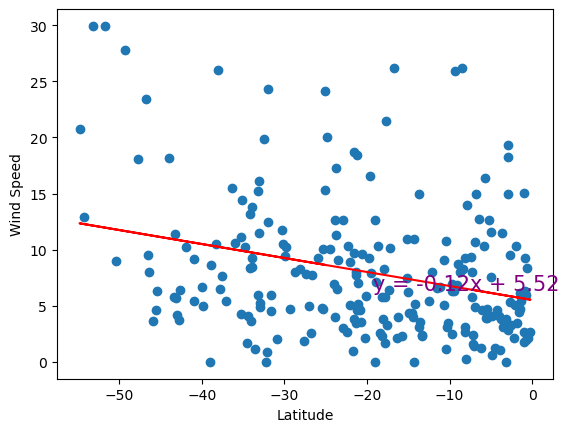

None


In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

**Discussion about the linear relationship:** Similarly to cloudiness in both northern and southern hemispheres, it does not appear to be a relationship correlation for windspeed and latitude. This is also evident with the R2 being negative for both hemispheres as oppose to 1, which would indicate that regression fits R2 percent of the variation of the indicated variable. 